1111.5992933698533
[0.02]


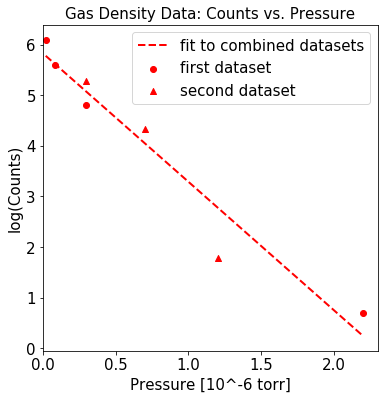

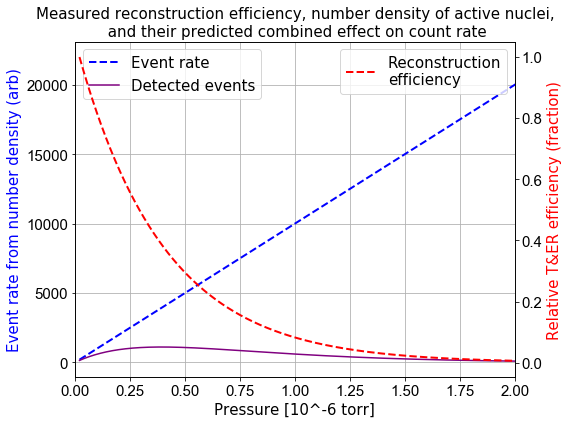

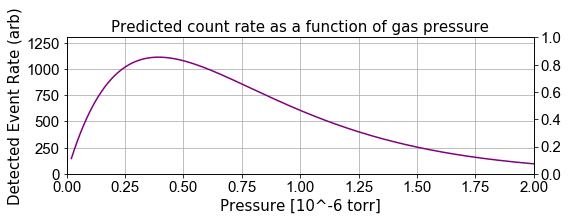

In [51]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  2 16:51:23 2018

@author: chrischtel
modified by Elise Novitski
"""
import numpy as np
import matplotlib.pyplot as plt

predicted_counts = 1e4
reference_pressure = 1e-6

pressures = np.array([2e-8,8.5e-8,3e-7,2.2e-6])
counts = np.array([444,272,122,2])
log_counts = np.log(counts)

pressures_new = np.array([3e-7,7e-7,1.2e-6])
counts_new = np.array([58+138,77,6])
log_counts_new = np.log(counts_new)

all_pressures = np.concatenate((pressures, pressures_new), axis=0)
all_log_counts = np.concatenate((log_counts, log_counts_new), axis=0)

plt.figure(figsize=(6,6))
plt.title('Gas Density Data: Counts vs. Pressure', fontsize=15)
plt.scatter(pressures*1e6, log_counts, label='first dataset', color='red')
plt.scatter(pressures_new*1e6, log_counts_new, label='second dataset', color='red', marker='^')
plt.xlim(np.min(pressures)*1e6, np.max(pressures)*1e6)
plt.xlabel('Pressure [10^-6 torr]', fontsize=15)
plt.ylabel('log(Counts)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,2.3)

fit = np.polyfit(all_pressures,all_log_counts,1)
fit_fn = np.poly1d(fit)
finer_pressures = np.linspace(np.min(all_pressures), np.max(all_pressures), 1000)

plt.plot(finer_pressures*1e6, fit_fn(finer_pressures), linestyle='--', linewidth=2, label='fit to combined datasets', color='red')
plt.legend(fontsize=15)
#plt.tight_layout()
plt.savefig('count_fit.png')


plt.figure(figsize=(8,6))
plt.title('Measured reconstruction efficiency, number density of active nuclei,\n and their predicted combined effect on count rate', fontsize=15)
ax = plt.gca()
ax2 = ax.twinx()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

ax.plot(finer_pressures*1e6, tritium_counts, linestyle='--', color='blue', linewidth=2, label='Event rate')
ax2.plot(finer_pressures*1e6, efficiency, linestyle='--', color='red', linewidth=2, label='Reconstruction\nefficiency')
ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

ax.legend(loc='upper left', fontsize=15)
ax2.legend(loc='upper right', fontsize=15, )
ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax.set_ylabel('Event rate from number density (arb)', fontsize=15)
ax2.set_ylabel('Relative T&ER efficiency (fraction)', fontsize=15)
ax.set_xlim(0,2)
ax.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')
ax.grid(True)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomout.png')


plt.figure(figsize=(8,3))
plt.title('Predicted count rate as a function of gas pressure', fontsize=15)
ax = plt.gca()
ax2 = ax.twinx()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax.set_ylabel('Detected Event Rate (arb)', fontsize=15)
ax.set_xlim(0,2)
ax.set_ylim(0,1300)
ax.grid(True)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomin.png')

print(np.max(tritium_counts*efficiency*.73))
print((1e6)*finer_pressures[np.where(np.max(tritium_counts*efficiency*.73))])

In [4]:
tritium_counts*efficiency*.73

array([ 146.        ,  161.03420864,  175.89762543,  190.59167987,
        205.11779081,  219.47736662,  233.67180523,  247.70249419,
        261.57081076,  275.27812195,  288.82578465,  302.21514563,
        315.44754169,  328.52429963,  341.44673643,  354.21615921,
        366.83386539,  379.30114269,  391.61926926,  403.78951369,
        415.81313508,  427.69138318,  439.42549834,  451.01671168,
        462.46624509,  473.77531131,  484.94511402,  495.97684786,
        506.87169853,  517.63084283,  528.25544873,  538.74667542,
        549.1056734 ,  559.33358453,  569.43154205,  579.4006707 ,
        589.24208675,  598.95689806,  608.54620414,  618.01109621,
        627.35265726,  636.5719621 ,  645.67007743,  654.64806188,
        663.5069661 ,  672.24783276,  680.87169666,  689.37958477,
        697.77251624,  706.05150254,  714.21754745,  722.27164711,
        730.21479013,  738.0479576 ,  745.77212312,  753.38825293,
        760.89730588,  768.30023354,  775.59798022,  782.79148

In [18]:
(.73*tritium_counts*efficiency)[171]

1111.5992933698533

In [19]:
(1e6*finer_pressures)[171]

0.39315315315315325

In [49]:
(.73*efficiency)[171]

0.2827395086252376

1111.5992933698533
[0.02]


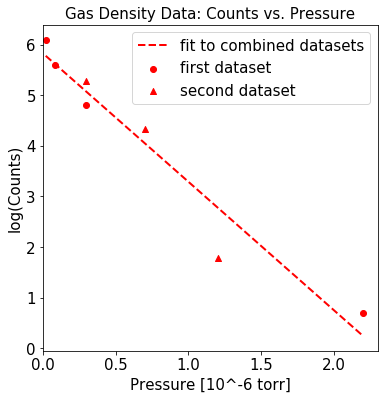

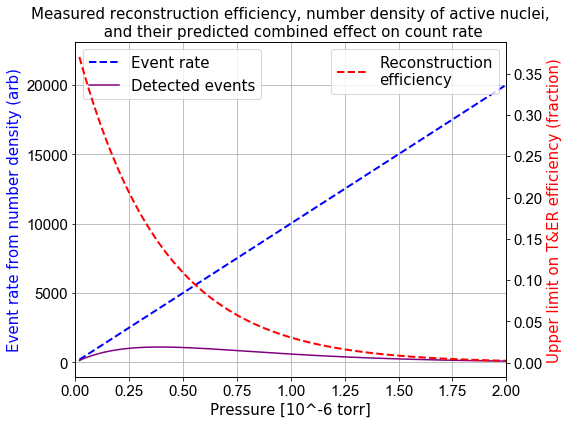

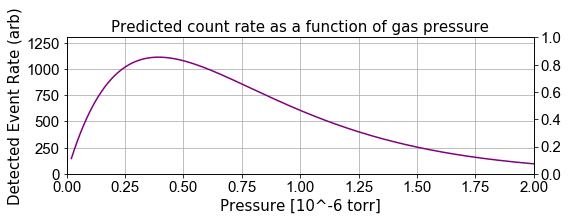

In [59]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  2 16:51:23 2018

@author: chrischtel
modified by Elise Novitski
"""
import numpy as np
import matplotlib.pyplot as plt

predicted_counts = 1e4
reference_pressure = 1e-6

pressures = np.array([2e-8,8.5e-8,3e-7,2.2e-6])
counts = np.array([444,272,122,2])
log_counts = np.log(counts)

pressures_new = np.array([3e-7,7e-7,1.2e-6])
counts_new = np.array([58+138,77,6])
log_counts_new = np.log(counts_new)

all_pressures = np.concatenate((pressures, pressures_new), axis=0)
all_log_counts = np.concatenate((log_counts, log_counts_new), axis=0)

plt.figure(figsize=(6,6))
plt.title('Gas Density Data: Counts vs. Pressure', fontsize=15)
plt.scatter(pressures*1e6, log_counts, label='first dataset', color='red')
plt.scatter(pressures_new*1e6, log_counts_new, label='second dataset', color='red', marker='^')
plt.xlim(np.min(pressures)*1e6, np.max(pressures)*1e6)
plt.xlabel('Pressure [10^-6 torr]', fontsize=15)
plt.ylabel('log(Counts)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,2.3)

fit = np.polyfit(all_pressures,all_log_counts,1)
fit_fn = np.poly1d(fit)
finer_pressures = np.linspace(np.min(all_pressures), np.max(all_pressures), 1000)

plt.plot(finer_pressures*1e6, fit_fn(finer_pressures), linestyle='--', linewidth=2, label='fit to combined datasets', color='red')
plt.legend(fontsize=15)
#plt.tight_layout()
plt.savefig('count_fit.png')


plt.figure(figsize=(8,6))
plt.title('Measured reconstruction efficiency, number density of active nuclei,\n and their predicted combined effect on count rate', fontsize=15)
ax = plt.gca()
ax2 = ax.twinx()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

ax.plot(finer_pressures*1e6, tritium_counts, linestyle='--', color='blue', linewidth=2, label='Event rate')
ax2.plot(finer_pressures*1e6, efficiency*.37, linestyle='--', color='red', linewidth=2, label='Reconstruction\nefficiency')
ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

ax.legend(loc='upper left', fontsize=15)
ax2.legend(loc='upper right', fontsize=15, )
ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax.set_ylabel('Event rate from number density (arb)', fontsize=15)
ax2.set_ylabel('Upper limit on T&ER efficiency (fraction)', fontsize=15)
ax.set_xlim(0,2)
ax.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')
ax.grid(True)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomout.png')


plt.figure(figsize=(8,3))
plt.title('Predicted count rate as a function of gas pressure', fontsize=15)
ax = plt.gca()
ax2 = ax.twinx()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax.set_ylabel('Detected Event Rate (arb)', fontsize=15)
ax.set_xlim(0,2)
ax.set_ylim(0,1300)
ax.grid(True)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomin.png')

print(np.max(tritium_counts*efficiency*.73))
print((1e6)*finer_pressures[np.where(np.max(tritium_counts*efficiency*.73))])

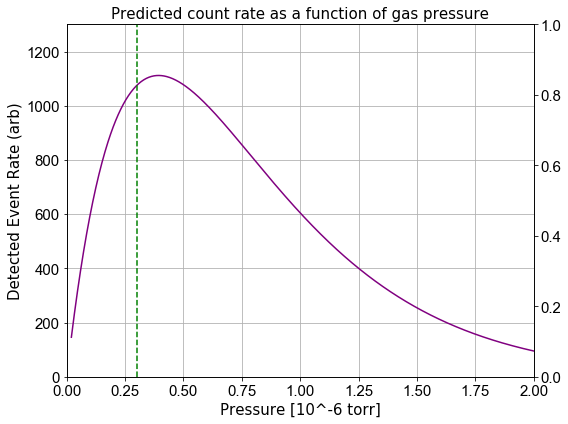

In [22]:
plt.figure(figsize=(8,6))
plt.title('Predicted count rate as a function of gas pressure', fontsize=15)
ax = plt.gca()
ax2 = ax.twinx()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax.set_ylabel('Detected Event Rate (arb)', fontsize=15)
ax.set_xlim(0,2)
ax.set_ylim(0,1300)
ax.grid(True)

plt.axvline(x=0.3, color='green', linestyle='--')

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomin.png')


1111.5992933698533
[0.02]


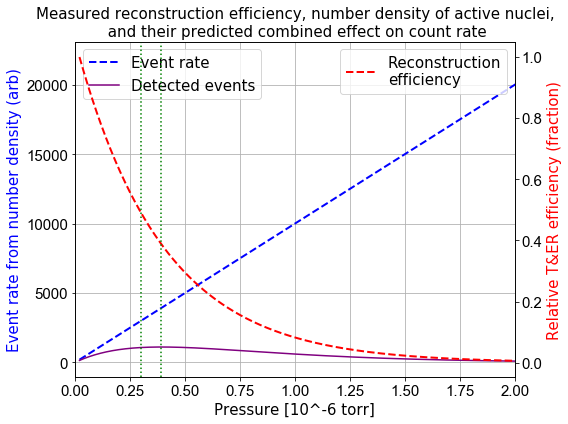

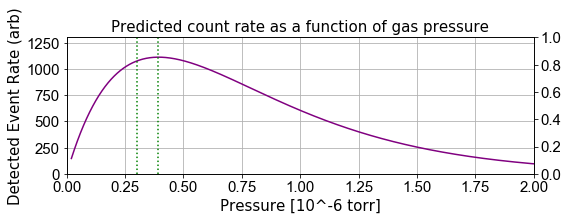

In [58]:
plt.figure(figsize=(8,6))
plt.title('Measured reconstruction efficiency, number density of active nuclei,\n and their predicted combined effect on count rate', fontsize=15)
ax = plt.gca()
ax2 = ax.twinx()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

ax.plot(finer_pressures*1e6, tritium_counts, linestyle='--', color='blue', linewidth=2, label='Event rate')
ax2.plot(finer_pressures*1e6, efficiency, linestyle='--', color='red', linewidth=2, label='Reconstruction\nefficiency')
ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

ax.legend(loc='upper left', fontsize=15)
ax2.legend(loc='upper right', fontsize=15, )
ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax.set_ylabel('Event rate from number density (arb)', fontsize=15)
ax2.set_ylabel('Relative T&ER efficiency (fraction)', fontsize=15)
ax.set_xlim(0,2)
ax.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')
ax.grid(True)
plt.axvline(x=0.3, color='green', linestyle=':')
plt.axvline(x=0.393, color='green', linestyle=':')

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomout.png')


plt.figure(figsize=(8,3))
plt.title('Predicted count rate as a function of gas pressure', fontsize=15)
ax = plt.gca()
ax2 = ax.twinx()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax.set_ylabel('Detected Event Rate (arb)', fontsize=15)
ax.set_xlim(0,2)
ax.set_ylim(0,1300)
ax.grid(True)
plt.axvline(x=0.3, color='green', linestyle=':')
plt.axvline(x=0.393, color='green', linestyle=':')

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomin.png')

print(np.max(tritium_counts*efficiency*.73))
print((1e6)*finer_pressures[np.where(np.max(tritium_counts*efficiency*.73))])

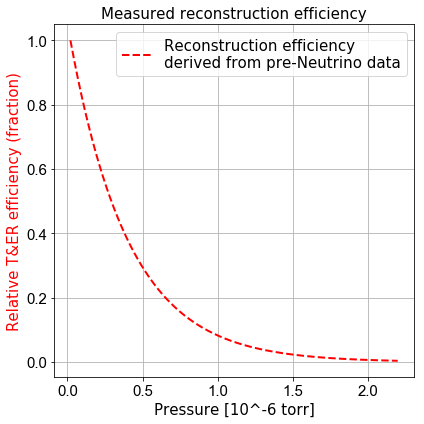

In [57]:
plt.figure(figsize=(6,6))
plt.title('Measured reconstruction efficiency', fontsize=15)
ax = plt.gca()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

#ax.plot(finer_pressures*1e6, tritium_counts, linestyle='--', color='blue', linewidth=2, label='Event rate')
ax.plot(finer_pressures*1e6, efficiency, linestyle='--', color='red', linewidth=2, label='Reconstruction efficiency\nderived from pre-Neutrino data')
#ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

ax.legend(loc='upper right', fontsize=15, )
ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax.set_ylabel('Relative T&ER efficiency (fraction)', fontsize=15)
ax.yaxis.label.set_color('red')
ax.grid(True)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomout.png')



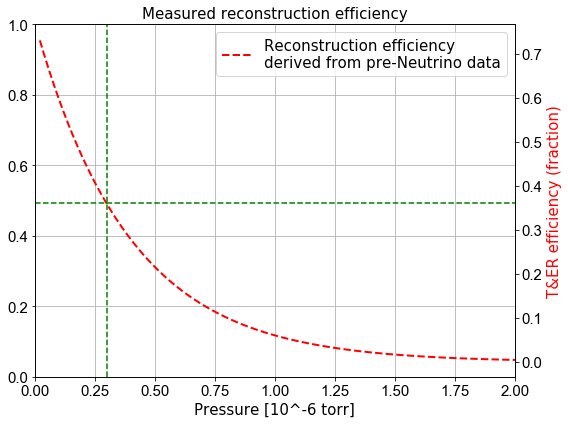

In [39]:
plt.figure(figsize=(8,6))
plt.title('Measured reconstruction efficiency', fontsize=15)
ax = plt.gca()
ax2 = ax.twinx()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

#ax.plot(finer_pressures*1e6, tritium_counts, linestyle='--', color='blue', linewidth=2, label='Event rate')
ax2.plot(finer_pressures*1e6, efficiency*.73, linestyle='--', color='red', linewidth=2, label='Reconstruction efficiency\nderived from pre-Neutrino data')
#ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

#ax.legend(loc='upper left', fontsize=15)
ax2.legend(loc='upper right', fontsize=15, )
ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax2.set_ylabel('Average track length (ms)', fontsize=15)
#ax.set_ylabel('Event rate from number density (arb)', fontsize=15)
ax2.set_ylabel('T&ER efficiency (fraction)', fontsize=15)
ax.set_xlim(0,2)
#ax.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')
ax.grid(True)

plt.axvline(x=0.3, color='green', linestyle='--')
plt.axhline(y=0.36, color='green', linestyle='--')

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomout.png')




In [ ]:
plt.figure(figsize=(8,6))
plt.title('Measured reconstruction efficiency, number density of active nuclei,\n and their predicted combined effect on count rate', fontsize=15)
ax = plt.gca()
ax2 = ax.twinx()

tritium_counts = finer_pressures/reference_pressure*predicted_counts
efficiency = fit_fn(finer_pressures)
efficiency = np.exp(efficiency)/np.max(np.exp(efficiency))

ax.plot(finer_pressures*1e6, tritium_counts, linestyle='--', color='blue', linewidth=2, label='Event rate')
ax2.plot(finer_pressures*1e6, efficiency*.73, linestyle='--', color='red', linewidth=2, label='Reconstruction\nefficiency')
ax.plot(finer_pressures*1e6, tritium_counts*efficiency*.73, color='purple', label='Detected events')

ax.legend(loc='upper left', fontsize=15)
ax2.legend(loc='upper right', fontsize=15, )
ax.set_xlabel('Pressure [10^-6 torr]', fontsize=15)
ax.set_ylabel('Event rate from number density (arb)', fontsize=15)
ax2.set_ylabel('T&ER efficiency (fraction)', fontsize=15)
ax.set_xlim(0,2)
ax.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')
ax.grid(True)

plt.axvline(x=0.3, color='green', linestyle='--')
plt.axvline(x=0.393, color='green', linestyle='--')
plt.axvline(x=0.3, color='green', linestyle='--')

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(15)
plt.tight_layout()
plt.savefig('expected_events_zoomout.png')



In [66]:
.37*efficiency[171]

0.143306326289504

In [64]:
1e6*finer_pressures

array([0.02      , 0.02218218, 0.02436436, 0.02654655, 0.02872873,
       0.03091091, 0.03309309, 0.03527528, 0.03745746, 0.03963964,
       0.04182182, 0.044004  , 0.04618619, 0.04836837, 0.05055055,
       0.05273273, 0.05491491, 0.0570971 , 0.05927928, 0.06146146,
       0.06364364, 0.06582583, 0.06800801, 0.07019019, 0.07237237,
       0.07455455, 0.07673674, 0.07891892, 0.0811011 , 0.08328328,
       0.08546547, 0.08764765, 0.08982983, 0.09201201, 0.09419419,
       0.09637638, 0.09855856, 0.10074074, 0.10292292, 0.10510511,
       0.10728729, 0.10946947, 0.11165165, 0.11383383, 0.11601602,
       0.1181982 , 0.12038038, 0.12256256, 0.12474474, 0.12692693,
       0.12910911, 0.13129129, 0.13347347, 0.13565566, 0.13783784,
       0.14002002, 0.1422022 , 0.14438438, 0.14656657, 0.14874875,
       0.15093093, 0.15311311, 0.1552953 , 0.15747748, 0.15965966,
       0.16184184, 0.16402402, 0.16620621, 0.16838839, 0.17057057,
       0.17275275, 0.17493493, 0.17711712, 0.1792993 , 0.18148